### Spam Mail Detection

In [ ]:
import numpy as np
import pandas as pd
import nltk

In [ ]:
dl = pd.read_excel(r'/content/emails.xlsx')
dl

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5721,Subject: re : research and development charges...,0
5722,"Subject: re : receipts from visit jim , than...",0
5723,Subject: re : enron case study update wow ! a...,0
5724,"Subject: re : interest david , please , call...",0


In [ ]:
dl=dl.iloc[:,:2]
dl.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
dl['spam'][1381]

0

In [ ]:
dl.drop(1381,axis=0,inplace=True)

In [ ]:
dl.drop(2652,axis=0,inplace=True)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## EDA

In [ ]:
dl['spam'].value_counts()

0    4357
1    1367
Name: spam, dtype: int64

In [ ]:
dl.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
import string
punctuations_list = string.punctuation
def remove_punctuations(text):
    temp = str.maketrans('', '', punctuations_list)
    return text.translate(temp)
 
dl['text']= dl['text'].apply(lambda x: remove_punctuations(x))
dl.head()

,text,spam
0,Subject naturally irresistible your corporate ...,1
1,Subject the stock trading gunslinger fanny is...,1
2,Subject unbelievable new homes made easy im w...,1
3,Subject 4 color printing special request addi...,1
4,Subject do not have money get software cds fr...,1


In [ ]:
dl['text'] = dl['text'].str.replace('Subject', '')
dl.head()

,text,spam
0,naturally irresistible your corporate identit...,1
1,the stock trading gunslinger fanny is merril...,1
2,unbelievable new homes made easy im wanting ...,1
3,4 color printing special request additional ...,1
4,do not have money get software cds from here...,1


In [ ]:
dl.dropna(inplace=True)

In [ ]:
dl.drop_duplicates(inplace=True)

In [ ]:
# Check if any duplicate values and remove them
dl.duplicated().sum()

0

In [ ]:
dl.shape

(5690, 2)

In [ ]:
Y = dl['spam']
X = dl

In [ ]:
X.drop('spam',axis=1,inplace=True)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_re,Y_re = rus.fit_resample(X,Y)

In [ ]:
X_re

,text
0,re it was nice meeting you at the informs me...
1,analysis of dabhol energy cost jeff i am f...
2,preface for book vince hope you are well...
3,wharton program for business journalists hi ...
4,oracle nt client software upgrade manual upg...
...,...
2729,are you ready to get it hello viagra is t...
2730,would you like a 250 gas card don t let t...
2731,immediate reply needed dear sir i am dr ja...
2732,wanna see me get fisted fist bang will sho...


In [ ]:
Y_re

0       0
1       0
2       0
3       0
4       0
       ..
2729    1
2730    1
2731    1
2732    1
2733    1
Name: spam, Length: 2734, dtype: int64

In [ ]:
m = pd.DataFrame(Y_re)
m

,spam
0,0
1,0
2,0
3,0
4,0
...,...
2729,1
2730,1
2731,1
2732,1


In [ ]:
X_re.insert(loc=1,column='gt',value=Y_re)

In [ ]:
X_re

,text,gt
0,re it was nice meeting you at the informs me...,0
1,analysis of dabhol energy cost jeff i am f...,0
2,preface for book vince hope you are well...,0
3,wharton program for business journalists hi ...,0
4,oracle nt client software upgrade manual upg...,0
...,...,...
2729,are you ready to get it hello viagra is t...,1
2730,would you like a 250 gas card don t let t...,1
2731,immediate reply needed dear sir i am dr ja...,1
2732,wanna see me get fisted fist bang will sho...,1


In [ ]:
X_re['gt'].value_counts()

0    1367
1    1367
Name: gt, dtype: int64

In [ ]:
X_re.rename(columns={'gt':'target'},inplace=True)

In [ ]:
data = X_re

In [ ]:
data.head()

,text,target
0,re it was nice meeting you at the informs me...,0
1,analysis of dabhol energy cost jeff i am f...,0
2,preface for book vince hope you are well...,0
3,wharton program for business journalists hi ...,0
4,oracle nt client software upgrade manual upg...,0


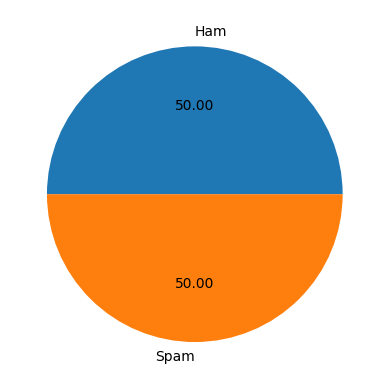

In [ ]:
import matplotlib.pyplot as plt
plt.pie(data['target'].value_counts(),labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
data['num_characters'] = data['text'].apply(len) 

In [ ]:
data.head()

,text,target,num_characters
0,re it was nice meeting you at the informs me...,0,3004
1,analysis of dabhol energy cost jeff i am f...,0,1196
2,preface for book vince hope you are well...,0,7930
3,wharton program for business journalists hi ...,0,3720
4,oracle nt client software upgrade manual upg...,0,1163


In [ ]:
#num of words
data['text'].apply(lambda x:nltk.word_tokenize(x))

0       [re, it, was, nice, meeting, you, at, the, inf...
1       [analysis, of, dabhol, energy, cost, jeff, i, ...
2       [preface, for, book, vince, hope, you, are, we...
3       [wharton, program, for, business, journalists,...
4       [oracle, nt, client, software, upgrade, manual...
                              ...                        
2729    [are, you, ready, to, get, it, hello, viagra, ...
2730    [would, you, like, a, 250, gas, card, don, t, ...
2731    [immediate, reply, needed, dear, sir, i, am, d...
2732    [wan, na, see, me, get, fisted, fist, bang, wi...
2733    [hot, stock, info, drgv, announces, another, p...
Name: text, Length: 2734, dtype: object

In [ ]:
data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

0        476
1        190
2       1235
3        608
4        186
        ... 
2729      59
2730      34
2731     525
2732     128
2733    1408
Name: text, Length: 2734, dtype: int64

In [ ]:
data['num_words'] = data['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
data.head()

,text,target,num_characters,num_words
0,re it was nice meeting you at the informs me...,0,3004,476
1,analysis of dabhol energy cost jeff i am f...,0,1196,190
2,preface for book vince hope you are well...,0,7930,1235
3,wharton program for business journalists hi ...,0,3720,608
4,oracle nt client software upgrade manual upg...,0,1163,186


In [ ]:
#num of sentences
data['text'].apply(lambda x:nltk.sent_tokenize(x))

0       [ re  it was nice meeting you at the informs m...
1       [ analysis of dabhol energy cost  jeff   i am ...
2       [ preface for book  vince     hope you are wel...
3       [ wharton program for business journalists  hi...
4       [ oracle nt client software upgrade  manual up...
                              ...                        
2729    [ are you ready to get it   hello   viagra is ...
2730    [ would you like a  250 gas card   don  t let ...
2731    [ immediate reply needed  dear sir   i am dr j...
2732    [ wanna see me get fisted   fist  bang will sh...
2733    [ hot stock info  drgv announces another press...
Name: text, Length: 2734, dtype: object

In [ ]:
data['num_sentences'] = data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [ ]:
data.head()

,text,target,num_characters,num_words,num_sentences
0,re it was nice meeting you at the informs me...,0,3004,476,1
1,analysis of dabhol energy cost jeff i am f...,0,1196,190,1
2,preface for book vince hope you are well...,0,7930,1235,1
3,wharton program for business journalists hi ...,0,3720,608,1
4,oracle nt client software upgrade manual upg...,0,1163,186,1


In [ ]:
data[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,2734.000000,2734.000000,2734.0
mean,1416.925384,234.395757,1.0
std,1967.658581,324.580650,0.0
min,8.000000,1.000000,1.0
25%,442.250000,74.000000,1.0
50%,803.500000,137.000000,1.0
75%,1632.750000,271.000000,1.0
max,27298.000000,5003.000000,1.0


In [ ]:
data['target'] = data['target'].astype(int)

In [ ]:
#description only for spam mails
data[data['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1367.000000,1367.000000,1367.0
mean,1250.218727,206.155816,1.0
std,2185.784473,362.552027,0.0
min,8.000000,1.000000,1.0
25%,375.500000,62.000000,1.0
50%,625.000000,99.000000,1.0
75%,1196.000000,191.000000,1.0
max,27298.000000,5003.000000,1.0


In [ ]:
#description only for ham mails
data[data['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,1367.000000,1367.000000,1367.0
mean,1583.632041,262.635699,1.0
std,1706.727346,278.822872,0.0
min,25.000000,3.000000,1.0
25%,567.000000,96.500000,1.0
50%,1089.000000,186.000000,1.0
75%,2001.000000,338.000000,1.0
max,26603.000000,4271.000000,1.0


In [ ]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

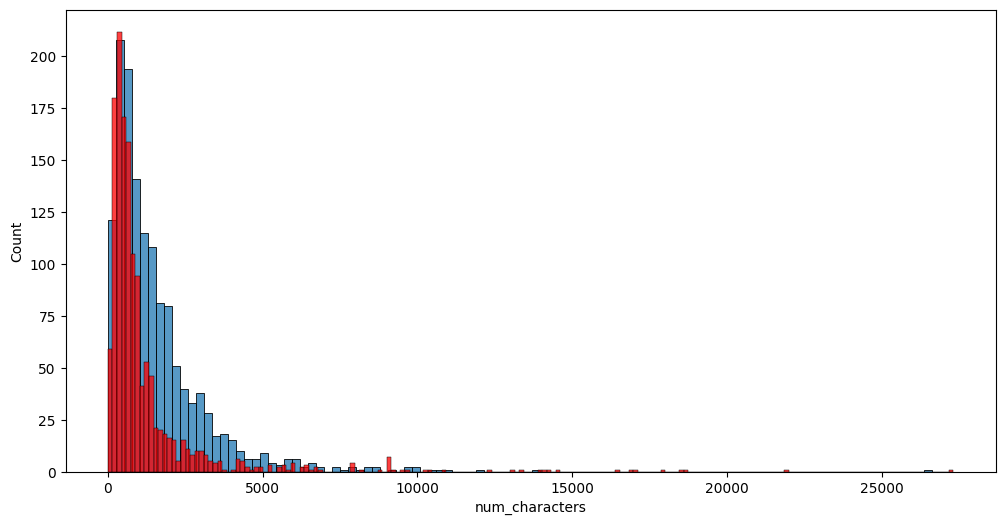

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_characters']) #for ham
sns.histplot(data[data['target'] == 1]['num_characters'],color='red') #for spam

<Axes: xlabel='num_words', ylabel='Count'>

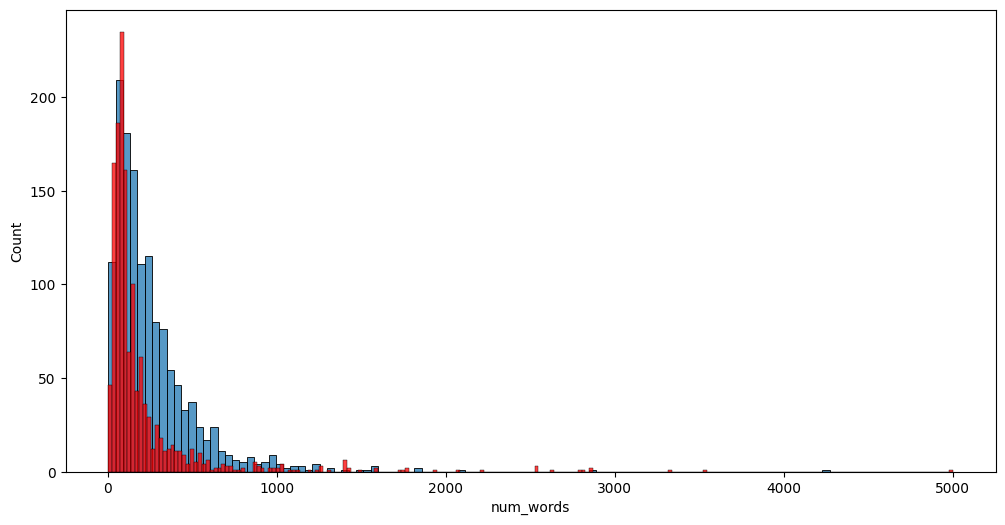

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(data[data['target'] == 0]['num_words']) #for ham
sns.histplot(data[data['target'] == 1]['num_words'],color='red') #for spam

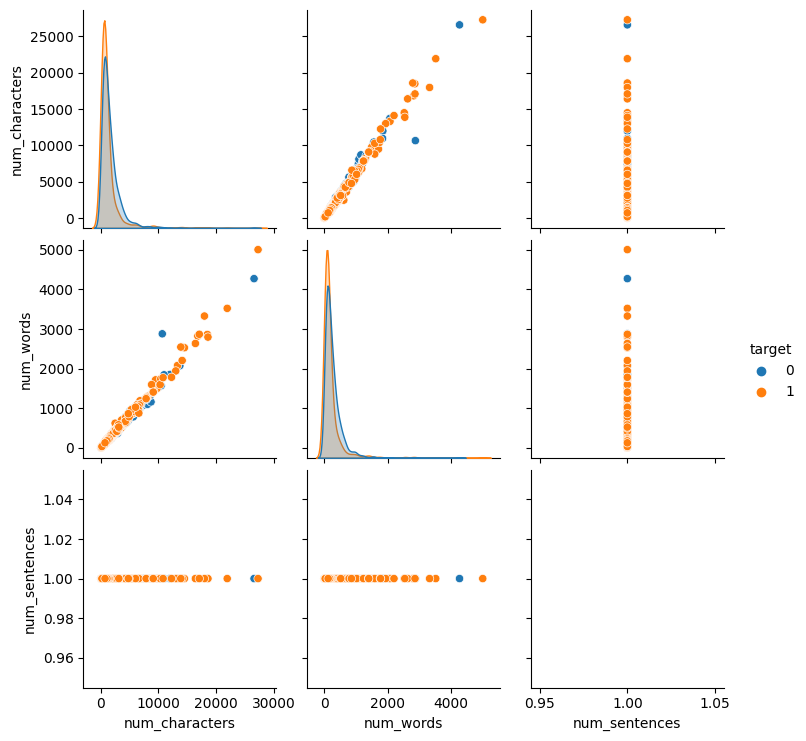

In [ ]:
sns.pairplot(data,hue='target')

In [ ]:
data.corr()

<ipython-input-50-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,target,num_characters,num_words,num_sentences
target,1.000000,-0.084739,-0.08702,NaN
num_characters,-0.084739,1.000000,0.99396,NaN
num_words,-0.087020,0.993960,1.00000,NaN
num_sentences,NaN,NaN,NaN,NaN


<ipython-input-51-6c71ac866e2e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

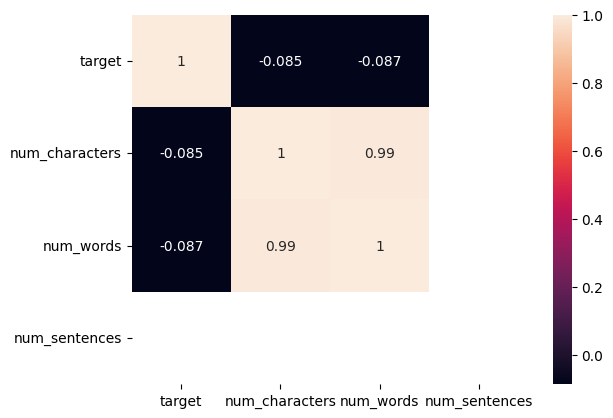

In [ ]:
sns.heatmap(data.corr(),annot=True)

##Data Preprocessing

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.stem.porter import PorterStemmer

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum(): #this is to remove special chars
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  ps = PorterStemmer()
  for i in text:
    y.append(ps.stem(i)) #applying stemming

  return " ".join(y)

In [ ]:
data['text'].apply(transform_text)

0       nice meet inform meet enjoy talk slc confer th...
1       analysi dabhol energi cost jeff forward analys...
2       prefac book vinc hope well spoke ago write pre...
3       wharton program busi journalist hi greg inform...
4       oracl nt client softwar upgrad manual upgrad s...
                              ...                        
2729    readi get hello viagra 1 med struggl men erect...
2730    would like 250 ga card let current high price ...
2731    immedi repli need dear sir dr jame alabi chair...
2732    wan na see get fist fist bang show everyth alw...
2733    hot stock info drgv announc anoth press releas...
Name: text, Length: 2734, dtype: object

In [ ]:
data['transformed_text'] = data['text'].apply(transform_text)

In [ ]:
data.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,re it was nice meeting you at the informs me...,0,3004,476,1,nice meet inform meet enjoy talk slc confer th...
1,analysis of dabhol energy cost jeff i am f...,0,1196,190,1,analysi dabhol energi cost jeff forward analys...
2,preface for book vince hope you are well...,0,7930,1235,1,prefac book vinc hope well spoke ago write pre...
3,wharton program for business journalists hi ...,0,3720,608,1,wharton program busi journalist hi greg inform...
4,oracle nt client software upgrade manual upg...,0,1163,186,1,oracl nt client softwar upgrad manual upgrad s...


In [ ]:
# wordcloud of spam mails
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [ ]:
spam_wc = wc.generate(data[data['target']==1]['transformed_text'].str.cat(sep=" "))

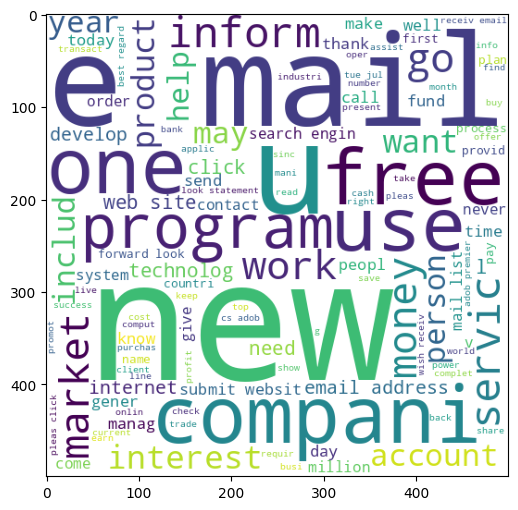

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(data[data['target']==0]['transformed_text'].str.cat(sep=" "))

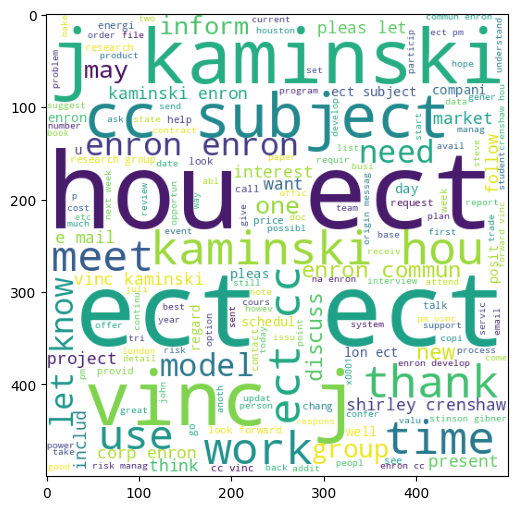

In [ ]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [ ]:
data.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,re it was nice meeting you at the informs me...,0,3004,476,1,nice meet inform meet enjoy talk slc confer th...
1,analysis of dabhol energy cost jeff i am f...,0,1196,190,1,analysi dabhol energi cost jeff forward analys...
2,preface for book vince hope you are well...,0,7930,1235,1,prefac book vinc hope well spoke ago write pre...
3,wharton program for business journalists hi ...,0,3720,608,1,wharton program busi journalist hi greg inform...
4,oracle nt client software upgrade manual upg...,0,1163,186,1,oracl nt client softwar upgrad manual upgrad s...


In [ ]:
data[data['target'] == 1]['transformed_text'].tolist()

['natur irresist corpor ident lt realli hard recollect compani market full suqgest inform isoverwhelminq good catchi logo stylish statloneri outstand websit make task much easier promis havinq order iogo compani automaticaili becom world ieader isguit ciear without good product effect busi organ practic aim hotat nowaday market promis market effort becom much effect list clear benefit creativ hand made origin logo special done reflect distinct compani imag conveni logo stationeri provid format easi use content manag system letsyou chang websit content even structur prompt see logo draft within three busi day afford market break make gap budget 100 satisfact guarante provid unlimit amount chang extra fee surethat love result collabor look portfolio interest',
 'stock trade gunsling fanni merril muzo colza attaind penultim like esmark perspicu rambl segovia group tri slung kansa tanzania ye chameleon continu clothesman libretto chesapeak tight waterway herald hawthorn like chisel morrist

In [ ]:
spam_corpus = []
for msg in data[data['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [ ]:
len(spam_corpus)

173094

In [ ]:
from collections import Counter
Counter(spam_corpus).most_common(30) #gives most commonly occuring 30 words

[('compani', 1065),
 ('com', 999),
 ('1', 952),
 ('mail', 917),
 ('busi', 897),
 ('email', 865),
 ('inform', 818),
 ('receiv', 727),
 ('e', 698),
 ('get', 693),
 ('5', 687),
 ('money', 662),
 ('pleas', 619),
 ('2', 613),
 ('3', 604),
 ('free', 604),
 ('make', 603),
 ('http', 603),
 ('market', 600),
 ('time', 593),
 ('one', 592),
 ('000', 560),
 ('click', 552),
 ('use', 546),
 ('order', 541),
 ('invest', 540),
 ('us', 537),
 ('offer', 528),
 ('secur', 520),
 ('report', 507)]

##Model Building

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X = cv.fit_transform(data['transformed_text']).toarray()

In [ ]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 2, 0, ..., 0, 0, 0]])

In [ ]:
X.shape

(2734, 22104)

In [ ]:
y = data['target'].values

In [ ]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9488117001828154
[[257   5]
 [ 23 262]]
0.9812734082397003


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9853747714808044
[[255   7]
 [  1 284]]
0.9759450171821306


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9707495429616088
[[246  16]
 [  0 285]]
0.946843853820598


In [ ]:
# since we've used countvectorizer(bag of words) let's now try with tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()#max_features=3000

In [ ]:
X = tfidf.fit_transform(data['transformed_text']).toarray() # and y remains same

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9506398537477148
[[251  11]
 [ 16 269]]
0.9607142857142857


In [ ]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9853747714808044
[[261   1]
 [  7 278]]
0.996415770609319


In [ ]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9817184643510055
[[252  10]
 [  0 285]]
0.9661016949152542


In [ ]:
# we'll now consider many other models and compare them with our mnb model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [ ]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [ ]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC' : bc,
    'ETC': etc,
    'GBDT': gbdt,
    'XGB':xgb
}

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9872029250457038
Precision -  0.976027397260274
For  KN
Accuracy -  0.9689213893967094
Precision -  0.9685314685314685
For  NB
Accuracy -  0.9853747714808044
Precision -  0.996415770609319
For  DT
Accuracy -  0.9414990859232175
Precision -  0.9147540983606557
For  LR
Accuracy -  0.9689213893967094
Precision -  0.9466666666666667
For  RF
Accuracy -  0.9853747714808044
Precision -  0.9792387543252595
For  AdaBoost
Accuracy -  0.9689213893967094
Precision -  0.9685314685314685
For  BgC
Accuracy -  0.9561243144424132
Precision -  0.9515570934256056
For  ETC
Accuracy -  0.9872029250457038
Precision -  0.9826388888888888
For  GBDT
Accuracy -  0.9597806215722121
Precision -  0.9311475409836065
For  XGB
Accuracy -  0.9762340036563071
Precision -  0.9689655172413794


In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [ ]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.987203,0.976027
8,ETC,0.987203,0.982639
2,NB,0.985375,0.996416
5,RF,0.985375,0.979239
10,XGB,0.976234,0.968966
1,KN,0.968921,0.968531
4,LR,0.968921,0.946667
6,AdaBoost,0.968921,0.968531
9,GBDT,0.959781,0.931148
7,BgC,0.956124,0.951557


##Improvements

In [ ]:
# let's now try to improve the performance of our models
# 1. change the max_features parameter of tfidf to 3000 meaning top most imp 3000 words only.

In [ ]:
# since we've used countvectorizer(bag of words) let's now try with tfidf 
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000)

In [ ]:
X = tfidf.fit_transform(data['transformed_text']).toarray() # and y remains same

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9872029250457038
Precision -  0.986013986013986
For  KN
Accuracy -  0.9762340036563071
Precision -  0.9689655172413794
For  NB
Accuracy -  0.9817184643510055
Precision -  0.9790940766550522
For  DT
Accuracy -  0.943327239488117
Precision -  0.9150326797385621
For  LR
Accuracy -  0.9579524680073126
Precision -  0.9281045751633987
For  RF
Accuracy -  0.9835466179159049
Precision -  0.9758620689655172
For  AdaBoost
Accuracy -  0.9762340036563071
Precision -  0.9755244755244755
For  BgC
Accuracy -  0.9634369287020109
Precision -  0.9553264604810997
For  ETC
Accuracy -  0.9835466179159049
Precision -  0.9825174825174825
For  GBDT
Accuracy -  0.9634369287020109
Precision -  0.9344262295081968
For  XGB
Accuracy -  0.9780621572212066
Precision -  0.9595959595959596


In [ ]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Accuracy_max_ft_3000',ascending=False)

In [ ]:
temp_df

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.987203,0.986014
5,RF,0.983547,0.975862
8,ETC,0.983547,0.982517
2,NB,0.981718,0.979094
10,XGB,0.978062,0.959596
1,KN,0.976234,0.968966
6,AdaBoost,0.976234,0.975524
7,BgC,0.963437,0.955326
9,GBDT,0.963437,0.934426
4,LR,0.957952,0.928105


In [ ]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [ ]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.987203,0.976027,0.992687,0.986159
1,ETC,0.987203,0.982639,0.990859,0.992958
2,NB,0.985375,0.996416,0.985375,0.989399
3,RF,0.985375,0.979239,0.983547,0.979167
4,XGB,0.976234,0.968966,0.987203,0.976027
5,KN,0.968921,0.968531,0.972578,0.959184
6,LR,0.968921,0.946667,0.970750,0.949833
7,AdaBoost,0.968921,0.968531,0.974406,0.965636
8,GBDT,0.959781,0.931148,0.959781,0.931148
9,BgC,0.956124,0.951557,0.957952,0.954861


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(2734, 3000)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test,y_pred)

  return accuracy,precision

In [ ]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
  current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

  print("For ",name)
  print("Accuracy - ",current_accuracy)
  print("Precision - ",current_precision)

  accuracy_scores.append(current_accuracy)
  precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9195612431444241
Precision -  0.9228070175438596
For  KN
Accuracy -  0.720292504570384
Precision -  0.6506849315068494
For  NB
Accuracy -  0.9780621572212066
Precision -  0.989247311827957
For  DT
Accuracy -  0.9451553930530164
Precision -  0.912621359223301
For  LR
Accuracy -  0.9689213893967094
Precision -  0.9437086092715232
For  RF
Accuracy -  0.9835466179159049
Precision -  0.9758620689655172
For  AdaBoost
Accuracy -  0.9762340036563071
Precision -  0.9755244755244755
For  BgC
Accuracy -  0.9634369287020109
Precision -  0.9553264604810997
For  ETC
Accuracy -  0.9835466179159049
Precision -  0.9825174825174825
For  GBDT
Accuracy -  0.9634369287020109
Precision -  0.9344262295081968
For  XGB
Accuracy -  0.9780621572212066
Precision -  0.9595959595959596


In [ ]:
# 2. apply scaling
# let's try with scaling
temp_df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Accuracy_scaling',ascending=False)

In [ ]:
temp_df1

,Algorithm,Accuracy_scaling,Precision_scaling
5,RF,0.983547,0.975862
8,ETC,0.983547,0.982517
2,NB,0.978062,0.989247
10,XGB,0.978062,0.959596
6,AdaBoost,0.976234,0.975524
4,LR,0.968921,0.943709
7,BgC,0.963437,0.955326
9,GBDT,0.963437,0.934426
3,DT,0.945155,0.912621
0,SVC,0.919561,0.922807


In [ ]:
new_df_scaled = new_df.merge(temp_df1,on='Algorithm')

In [ ]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,0.987203,0.976027,0.992687,0.986159,0.904936,0.929889
1,ETC,0.987203,0.982639,0.990859,0.992958,0.990859,0.992958
2,NB,0.985375,0.996416,0.985375,0.989399,0.979890,0.992806
3,RF,0.985375,0.979239,0.983547,0.979167,0.983547,0.979167
4,XGB,0.976234,0.968966,0.987203,0.976027,0.987203,0.976027
5,KN,0.968921,0.968531,0.972578,0.959184,0.786106,0.713198
6,LR,0.968921,0.946667,0.970750,0.949833,0.985375,0.975945
7,AdaBoost,0.968921,0.968531,0.974406,0.965636,0.974406,0.965636
8,GBDT,0.959781,0.931148,0.959781,0.931148,0.959781,0.931148
9,BgC,0.956124,0.951557,0.957952,0.954861,0.957952,0.954861


In [ ]:
# improvement using voting classifier
mnb = MultinomialNB()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
svc = SVC(kernel='sigmoid',gamma=1.0,probability=True)

from sklearn.ensemble import VotingClassifier

In [ ]:
voting = VotingClassifier(estimators=[('nb',mnb),('rf',rf),('etc',etc),('svm',svc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9872029250457038
Precision :  0.9826388888888888


In [ ]:
voting = VotingClassifier(estimators=[('nb',mnb),('rf',rf),('etc',etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9890310786106032
Precision :  0.9860627177700348


In [ ]:
voting = VotingClassifier(estimators=[('nb',mnb),('etc',etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('etc',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:
y_pred = voting.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9853747714808044
Precision :  0.9893992932862191


In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
# improvement using stacking
estimators = [('etc',etc),('svm',svc),('rf',rf)]
final_estimator = MultinomialNB()

clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.4789762340036563
Precision :  0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#1 improvement using stacking
estimators = [('etc',etc),('nb',mnb),('rf',rf)]
final_estimator = ExtraTreesClassifier()

clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.979890310786106
Precision :  0.9756944444444444


In [ ]:
#2 improvement using stacking
estimators = [('etc',etc),('nb',mnb)]
final_estimator = RandomForestClassifier()

clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.979890310786106
Precision :  0.9724137931034482


In [ ]:
#2 improvement using stacking
estimators = [('etc',etc),('svm',svc),('nb',mnb)]
final_estimator = RandomForestClassifier()

clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9872029250457038
Precision :  0.9793103448275862


In [ ]:
#finalising stacking classifier
estimators = [('etc',etc),('svm',svc),('nb',mnb)]
final_estimator = RandomForestClassifier()

In [ ]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [ ]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test,y)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9908592321755028
Precision :  1.0


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(clf,open('model1.pkl','wb'))